In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

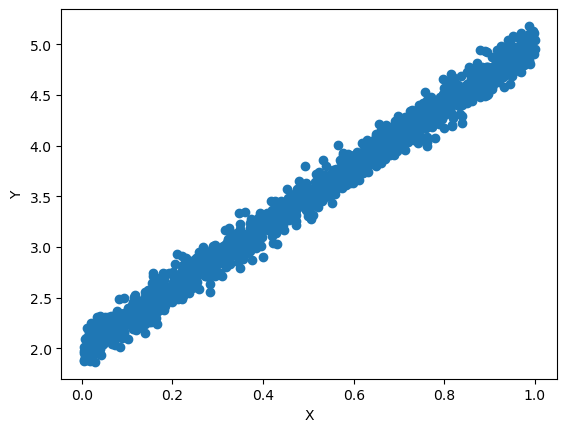

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create a random 2-D numpy array with 1500 values
x = np.random.rand(1500, 1)
y = 3 * x + 2 + 0.1 * np.random.randn(1500, 1)  # Simulated linear relationship with noise
plt.scatter(x, y, label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# Simulate different lines of fit using 1000 values
num_samples = 1000
random_indices = np.random.choice(len(x), num_samples, replace=False)
x_sampled = x[random_indices]
y_sampled = y[random_indices]

# Initialize variables for the line of best fit
best_fit_line = None
best_mse = float('inf')  # Initialize with a large value

In [4]:
# Iterate through various lines of fit
for i in range(num_samples):
    model = LinearRegression()
    model.fit(x_sampled[:i + 2], y_sampled[:i + 2])

    # Predict using the model
    y_pred = model.predict(x_sampled)

    # Calculate mean squared error
    mse = mean_squared_error(y_sampled, y_pred)

    # Update the best fit line if the current line has lower error
    if mse < best_mse:
        best_mse = mse
        best_fit_line = model
        
# Print the coefficients of the line of best fit
print("Coefficients of the Line of Best Fit:")
print("Slope (m):", best_fit_line.coef_[0][0])
print("Intercept (b):", best_fit_line.intercept_[0])

Coefficients of the Line of Best Fit:
Slope (m): 3.0212148884612544
Intercept (b): 1.9926192152120887


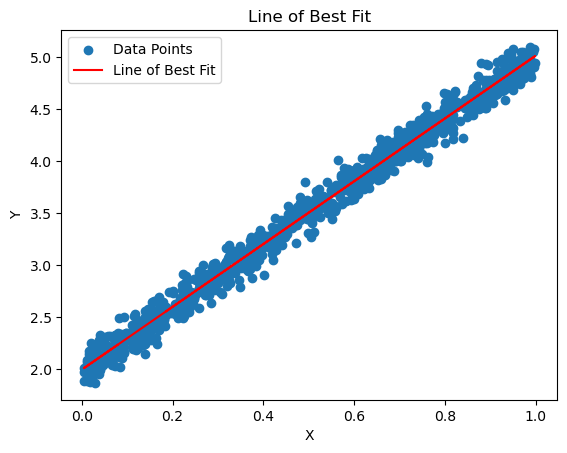

In [5]:
# Plot the data points and the line of best fit
plt.scatter(x_sampled, y_sampled, label="Data Points")
plt.plot(x_sampled, best_fit_line.predict(x_sampled), color='red', label="Line of Best Fit")
plt.title("Line of Best Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [6]:
# Use the line of best fit to predict the target variable for the remaining 500 values
x_remaining = x[~np.isin(np.arange(len(x)), random_indices)]  # Select the remaining 500 values
y_pred_remaining = best_fit_line.predict(x_remaining)

# Print the predicted values for the remaining 500 values
print("Predicted Values for the Remaining 500 Values:")
print(y_pred_remaining)

Predicted Values for the Remaining 500 Values:
[[2.46391218]
 [2.0548094 ]
 [4.50760732]
 [3.29761794]
 [3.37050464]
 [2.59587662]
 [3.82814277]
 [4.43496132]
 [4.05983422]
 [3.32241448]
 [3.56385646]
 [2.55110425]
 [4.83104741]
 [4.77779938]
 [2.58472556]
 [4.41622868]
 [4.97421672]
 [2.59298199]
 [4.45630342]
 [4.32279267]
 [2.99233325]
 [4.19691626]
 [3.91881734]
 [3.41928198]
 [4.29111433]
 [3.48448182]
 [2.08757354]
 [3.52912056]
 [4.73457256]
 [2.74578461]
 [3.23247421]
 [2.68386764]
 [2.22519206]
 [2.47970337]
 [4.43412454]
 [3.62208803]
 [2.0136231 ]
 [3.55999717]
 [4.11659056]
 [3.09122238]
 [4.92858171]
 [3.4949138 ]
 [2.14814758]
 [2.71638717]
 [4.97048104]
 [2.72392021]
 [3.10377109]
 [3.902951  ]
 [4.51624755]
 [3.77783377]
 [4.0800906 ]
 [4.8226818 ]
 [3.02305395]
 [4.78631734]
 [4.64324993]
 [2.7719163 ]
 [4.46162309]
 [3.67000017]
 [3.59280743]
 [4.70330082]
 [4.71297566]
 [3.93233478]
 [4.70734451]
 [2.29918655]
 [2.47845489]
 [3.65046191]
 [4.08298329]
 [4.55830563]
 

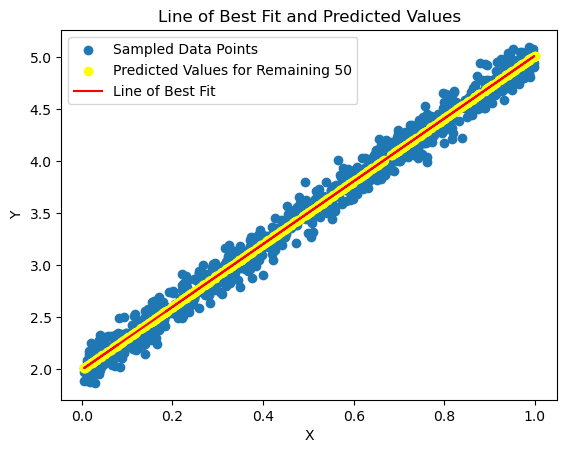

In [7]:
# Plot the original data points, line of best fit, and predicted values for the remaining 500 values
plt.scatter(x_sampled, y_sampled, label="Sampled Data Points")
plt.scatter(x_remaining, y_pred_remaining, color='yellow', label="Predicted Values for Remaining 50")

# Plot the line of best fit
plt.plot(x_sampled, best_fit_line.predict(x_sampled), color='red', label="Line of Best Fit")

plt.title("Line of Best Fit and Predicted Values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
